In [1]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
ckpt = 'Narrativa/byt5-base-tweet-hate-detection'

tokenizer = AutoTokenizer.from_pretrained(ckpt)
model = T5ForConditionalGeneration.from_pretrained(ckpt).to("cpu")

In [3]:
def classify_tweet(tweet):
    inputs = tokenizer([tweet], padding='max_length', truncation=True, max_length=512, return_tensors='pt')
    input_ids = inputs.input_ids.to('cpu')
    attention_mask = inputs.attention_mask.to('cpu')
    output = model.generate(input_ids, attention_mask=attention_mask)
    return tokenizer.decode(output[0], skip_special_tokens=True)

In [44]:
df = pd.read_csv('D:\BITEhack 2022\Golem-2\Golem-2\hate-speech')

In [45]:
df.head()

,text,label
0,"The white man has no future in Canada , that i...",idk/skip
1,I take the assumption that your Nation is so c...,noHate
2,If you want to hear what a black `` intellectu...,hate
3,I 've always considered teaching as one of the...,hate
4,And the sad thing is the white students at tho...,hate


In [46]:
df['label'].value_counts()

noHate      241
hate        236
idk/skip      1
Name: label, dtype: int64

In [47]:
import numpy as np

df.label = np.where(df.label == 'noHate', 'no-hate-speech', 'hate-speech')

In [48]:
df.head()

,text,label
0,"The white man has no future in Canada , that i...",hate-speech
1,I take the assumption that your Nation is so c...,no-hate-speech
2,If you want to hear what a black `` intellectu...,hate-speech
3,I 've always considered teaching as one of the...,hate-speech
4,And the sad thing is the white students at tho...,hate-speech


In [49]:
df.sample(50)['label'].value_counts()

no-hate-speech    25
hate-speech       25
Name: label, dtype: int64

In [58]:
df_sample = df.sample(50)

In [59]:
y_pred = [classify_tweet(txt) for txt in df_sample['text']]


In [60]:
y_true = df_sample['label'].values

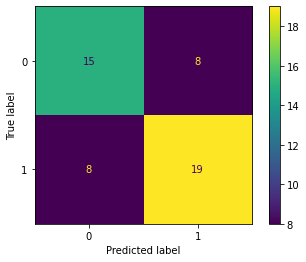

In [61]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [62]:
print(classification_report(y_true, y_pred))

                precision    recall  f1-score   support

   hate-speech       0.65      0.65      0.65        23
no-hate-speech       0.70      0.70      0.70        27

      accuracy                           0.68        50
     macro avg       0.68      0.68      0.68        50
  weighted avg       0.68      0.68      0.68        50

